In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Chia train test theo tỉ lệ 8:2**

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Btc.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [4]:
# 4. Chia train, test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]   # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
# 8. Define LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 12s 298ms/step - loss: 0.0263 - val_loss: 0.0039
Epoch 2/100
23/23 [==============================] - 4s 173ms/step - loss: 0.0038 - val_loss: 0.0072
Epoch 3/100
23/23 [==============================] - 4s 171ms/step - loss: 0.0027 - val_loss: 0.0035
Epoch 4/100
23/23 [==============================] - 6s 263ms/step - loss: 0.0023 - val_loss: 0.0067
Epoch 5/100
23/23 [==============================] - 4s 172ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 6/100
23/23 [==============================] - 4s 173ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/100
23/23 [==============================] - 6s 252ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 8/100
23/23 [==============================] - 4s 172ms/step - loss: 0.0018 - val_loss: 0.0040
Epoch 9/100
23/23 [==============================] - 4s 172ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 10/100
23/23 [==============================] - 5s 234ms/step - loss: 0.0016 - val_l

In [10]:
# 10. Dự báo dữ liệu test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

9/9 [==============================] - 0s 37ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, ytest)
test_rmse = np.sqrt(np.mean((y_pred_test - ytest)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, ytest)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1252.5287658127206
Testing RMSE: 1876.314968662498
Testing MAPE: 0.024795426115434803


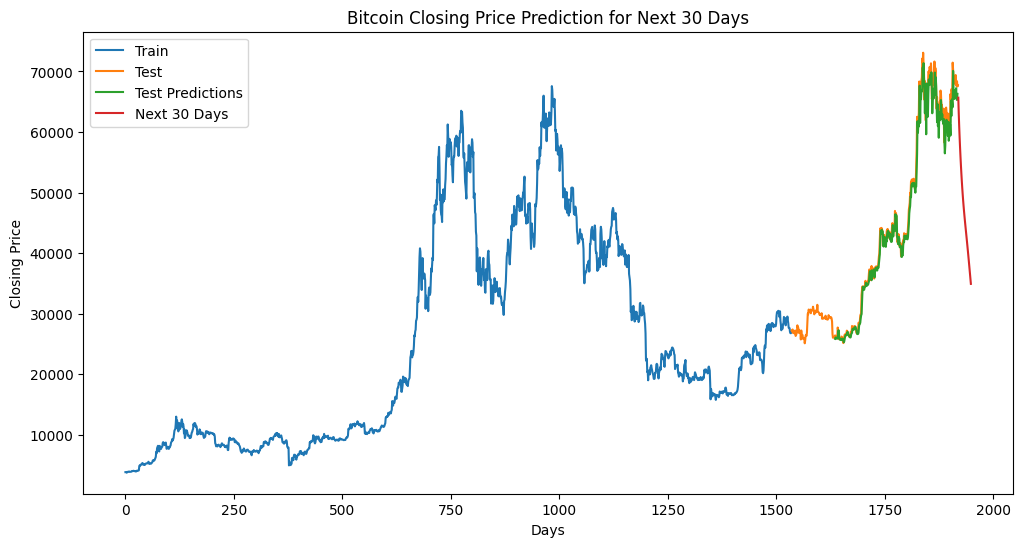

Predicted closing prices for the next 30 days:
[65665.51  63157.45  61039.266 59194.844 57526.85  55987.07  54560.68
 53238.273 52012.4   50876.68  49824.76  48849.496 47942.316 47093.39
 46292.    45527.055 44787.72  44064.01  43347.16  42629.926 41906.715
 41173.6   40428.28  39669.92  38898.957 38116.855 37325.957 36529.26
 35730.176 34932.344]


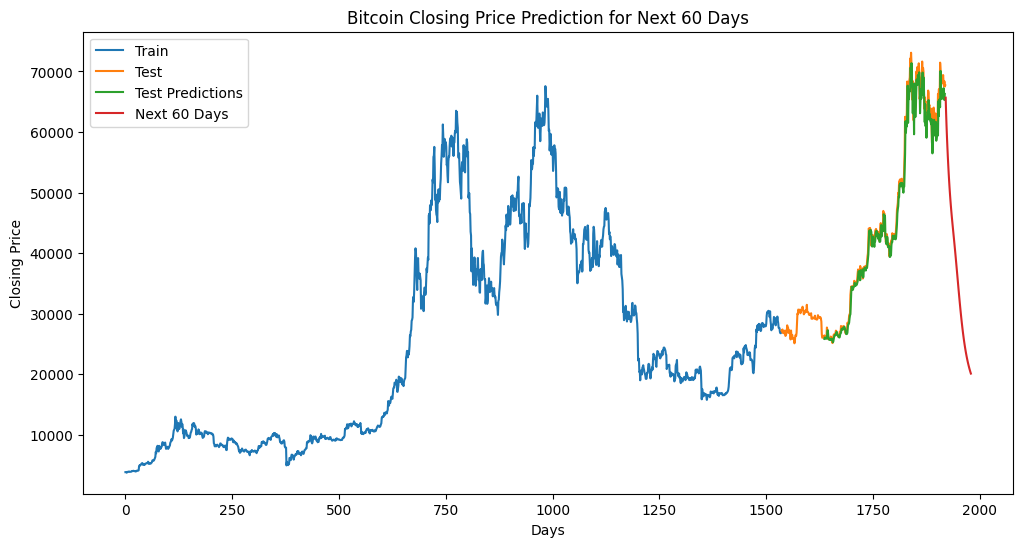

Predicted closing prices for the next 60 days:
[65665.51  63157.45  61039.266 59194.844 57526.85  55987.07  54560.68
 53238.273 52012.4   50876.68  49824.76  48849.496 47942.316 47093.39
 46292.    45527.055 44787.72  44064.01  43347.16  42629.926 41906.715
 41173.6   40428.28  39669.92  38898.957 38116.855 37325.957 36529.26
 35730.176 34932.344 34139.504 33355.363 32583.436 31826.932 31088.748
 30371.355 29676.8   29006.713 28362.27  27744.234 27152.982 26588.574
 26050.773 25539.074 25052.79  24591.062 24152.926 23737.312 23343.146
 22969.29  22614.64  22278.107 21958.654 21655.287 21367.082 21093.152
 20832.697 20584.955 20349.248 20124.93 ]


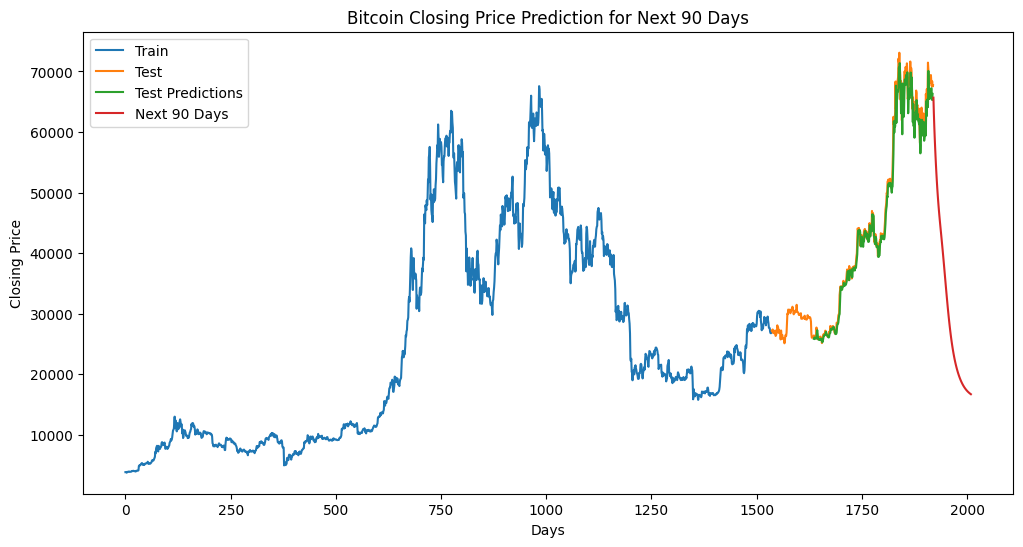

Predicted closing prices for the next 90 days:
[65665.51  63157.45  61039.266 59194.844 57526.85  55987.07  54560.68
 53238.273 52012.4   50876.68  49824.76  48849.496 47942.316 47093.39
 46292.    45527.055 44787.72  44064.01  43347.16  42629.926 41906.715
 41173.6   40428.28  39669.92  38898.957 38116.855 37325.957 36529.26
 35730.176 34932.344 34139.504 33355.363 32583.436 31826.932 31088.748
 30371.355 29676.8   29006.713 28362.27  27744.234 27152.982 26588.574
 26050.773 25539.074 25052.79  24591.062 24152.926 23737.312 23343.146
 22969.29  22614.64  22278.107 21958.654 21655.287 21367.082 21093.152
 20832.697 20584.955 20349.248 20124.93  19911.412 19708.162 19514.652
 19330.434 19155.068 18988.15  18829.297 18678.14  18534.338 18397.564
 18267.494 18143.834 18026.29  17914.566 17808.389 17707.488 17611.605
 17520.482 17433.873 17351.547 17273.264 17198.814 17127.982 17060.57
 16996.383 16935.23  16876.938 16821.342 16768.281 16717.607]


In [13]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 7:3**

In [14]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Btc.csv')
df1=df.reset_index()['Close']

In [15]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [16]:
# 4. Chia train, test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [17]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]   # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
# 8. Define LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 12s 338ms/step - loss: 0.0460 - val_loss: 0.0155
Epoch 2/100
20/20 [==============================] - 4s 189ms/step - loss: 0.0043 - val_loss: 0.0019
Epoch 3/100
20/20 [==============================] - 4s 185ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 4/100
20/20 [==============================] - 6s 280ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 5/100
20/20 [==============================] - 4s 186ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 6/100
20/20 [==============================] - 4s 200ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 7/100
20/20 [==============================] - 5s 264ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 8/100
20/20 [==============================] - 4s 190ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 9/100
20/20 [==============================] - 4s 190ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 10/100
20/20 [==============================] - 5s 240ms/step - loss: 0.0019 - val_l

In [22]:
# 10. Dự báo dữ liệu test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

15/15 [==============================] - 1s 72ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [24]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, ytest)
test_rmse = np.sqrt(np.mean((y_pred_test - ytest)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, ytest)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1226.4234906486838
Testing RMSE: 1531.363415794876
Testing MAPE: 0.03210697792877611


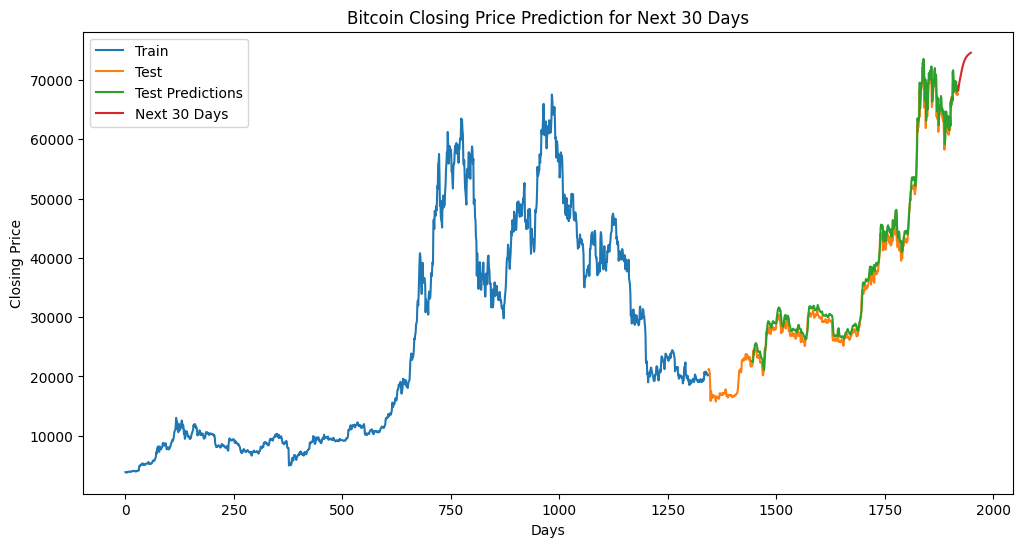

Predicted closing prices for the next 30 days:
[68264.51  68856.57  69390.11  69820.75  70193.34  70555.62  70925.195
 71295.945 71653.945 71988.21  72293.75  72569.99  72818.32  73040.6
 73238.73  73414.625 73570.54  73708.73  73831.52  73941.164 74039.63
 74128.7   74209.81  74284.125 74352.49  74415.55  74473.695 74527.13
 74575.93  74620.07 ]


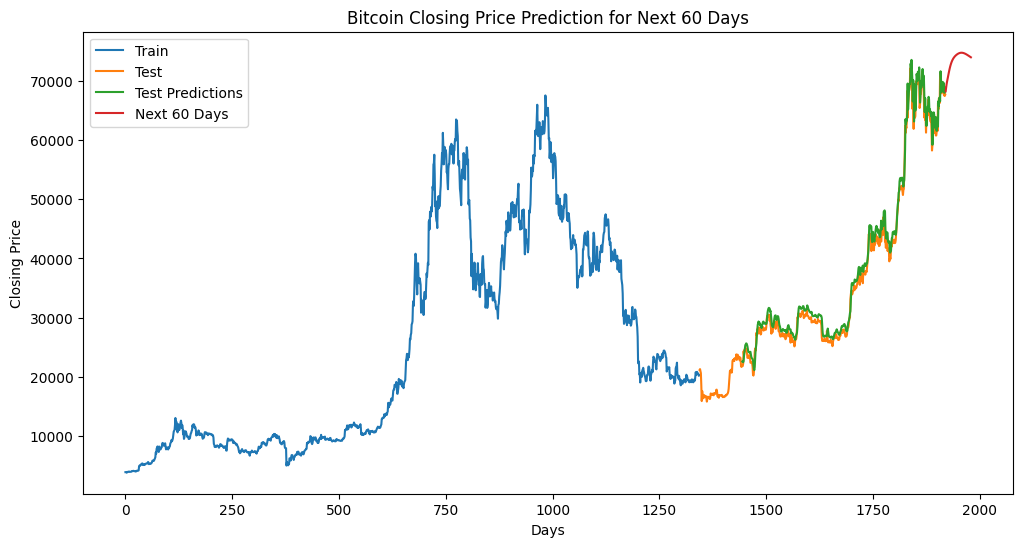

Predicted closing prices for the next 60 days:
[68264.51  68856.57  69390.11  69820.75  70193.34  70555.62  70925.195
 71295.945 71653.945 71988.21  72293.75  72569.99  72818.32  73040.6
 73238.73  73414.625 73570.54  73708.73  73831.52  73941.164 74039.63
 74128.7   74209.81  74284.125 74352.49  74415.55  74473.695 74527.13
 74575.93  74620.07  74659.414 74693.805 74723.08  74747.125 74765.85
 74779.2   74787.17  74789.805 74787.234 74779.62  74767.18  74750.21
 74728.98  74703.766 74674.9   74642.74  74607.61  74569.87  74529.875
 74487.9   74444.28  74399.3   74353.23  74306.29  74258.72  74210.695
 74162.42  74114.086 74065.81  74017.73 ]


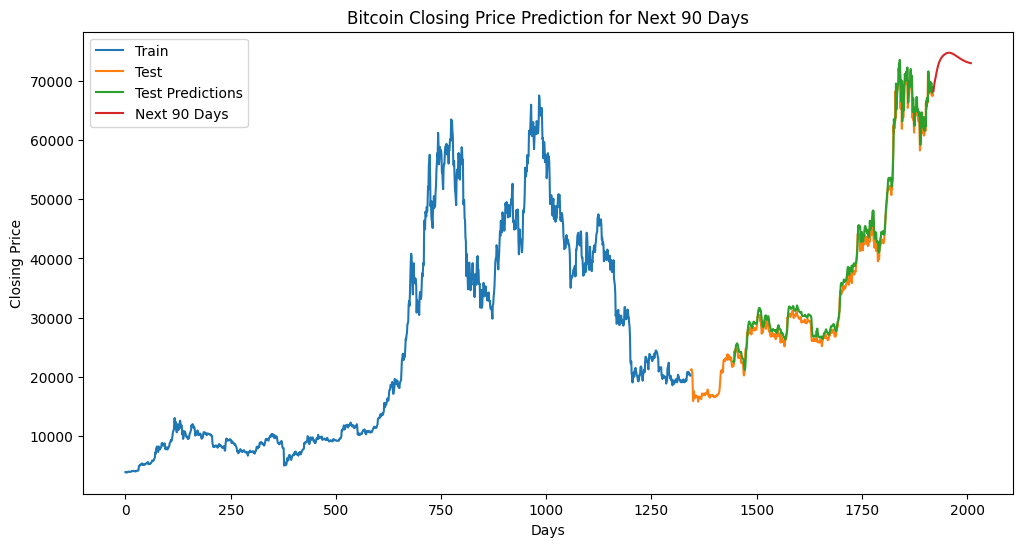

Predicted closing prices for the next 90 days:
[68264.51  68856.57  69390.11  69820.75  70193.34  70555.62  70925.195
 71295.945 71653.945 71988.21  72293.75  72569.99  72818.32  73040.6
 73238.73  73414.625 73570.54  73708.73  73831.52  73941.164 74039.63
 74128.7   74209.81  74284.125 74352.49  74415.55  74473.695 74527.13
 74575.93  74620.07  74659.414 74693.805 74723.08  74747.125 74765.85
 74779.2   74787.17  74789.805 74787.234 74779.62  74767.18  74750.21
 74728.98  74703.766 74674.9   74642.74  74607.61  74569.87  74529.875
 74487.9   74444.28  74399.3   74353.23  74306.29  74258.72  74210.695
 74162.42  74114.086 74065.81  74017.73  73969.96  73922.65  73875.89
 73829.8   73784.414 73739.87  73696.17  73653.45  73611.75  73571.1
 73531.57  73493.2   73456.016 73420.05  73385.37  73351.97  73319.89
 73289.1   73259.695 73231.625 73204.914 73179.56  73155.56  73132.91
 73111.55  73091.52  73072.805 73055.36  73039.19  73024.234]


In [25]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 6:4**

In [26]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Btc.csv')
df1=df.reset_index()['Close']

In [27]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [28]:
# 4. Chia train, test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [29]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]   # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [30]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [32]:
# 8. Define LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
17/17 [==============================] - 12s 372ms/step - loss: 0.0397 - val_loss: 0.0113
Epoch 2/100
17/17 [==============================] - 3s 202ms/step - loss: 0.0056 - val_loss: 0.0036
Epoch 3/100
17/17 [==============================] - 3s 202ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 4/100
17/17 [==============================] - 5s 271ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 5/100
17/17 [==============================] - 4s 208ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 6/100
17/17 [==============================] - 3s 203ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 7/100
17/17 [==============================] - 3s 203ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 8/100
17/17 [==============================] - 5s 295ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 9/100
17/17 [==============================] - 3s 202ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 10/100
17/17 [==============================] - 3s 200ms/step - loss: 0.0021 - val_l

In [34]:
# 10. Dự báo dữ liệu test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

21/21 [==============================] - 1s 38ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [36]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, ytest)
test_rmse = np.sqrt(np.mean((y_pred_test - ytest)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, ytest)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 960.3903085091827
Testing RMSE: 1267.363772365652
Testing MAPE: 0.030844826924378902


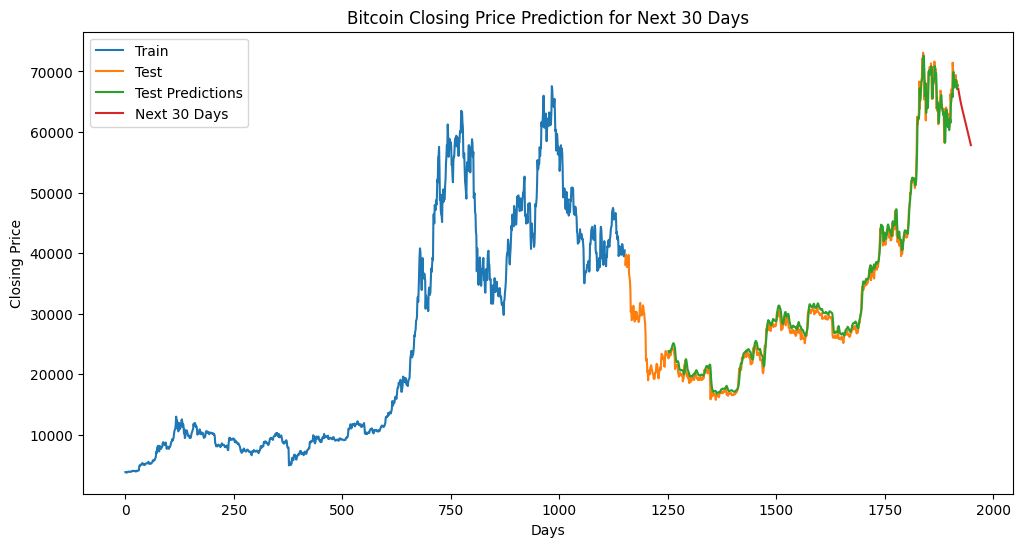

Predicted closing prices for the next 30 days:
[67118.03  66713.914 66275.18  65865.17  65481.05  65119.32  64775.4
 64444.848 64124.234 63811.164 63503.93  63201.266 62902.11  62605.523
 62310.625 62016.562 61722.598 61428.105 61132.617 60835.844 60537.613
 60237.98  59937.062 59635.156 59332.695 59030.168 58728.094 58427.145
 58127.926 57831.082]


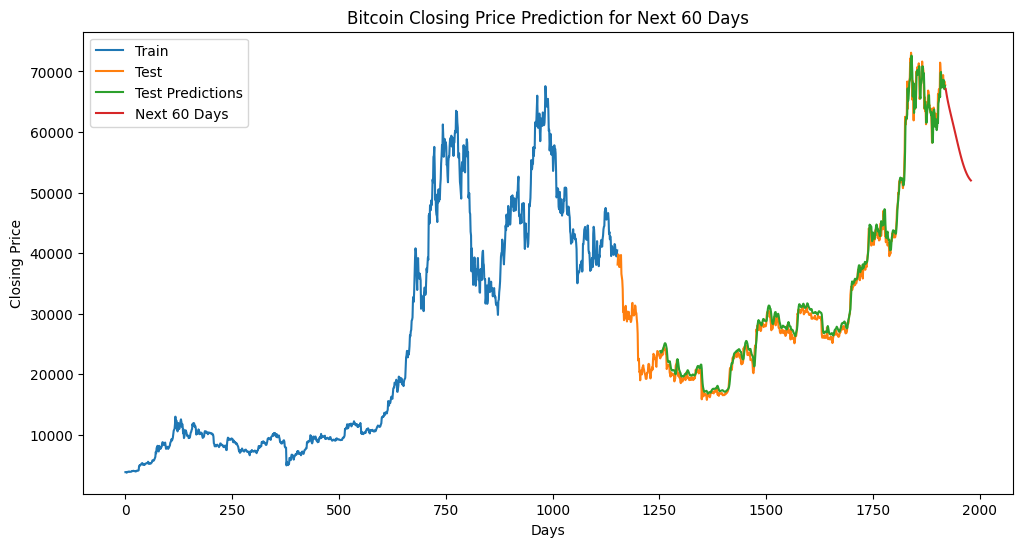

Predicted closing prices for the next 60 days:
[67118.03  66713.914 66275.18  65865.17  65481.05  65119.32  64775.4
 64444.848 64124.234 63811.164 63503.93  63201.266 62902.11  62605.523
 62310.625 62016.562 61722.598 61428.105 61132.617 60835.844 60537.613
 60237.98  59937.062 59635.156 59332.695 59030.168 58728.094 58427.145
 58127.926 57831.082 57537.26  57247.105 56961.223 56680.188 56404.547
 56134.758 55871.258 55614.46  55364.723 55122.312 54887.484 54660.46
 54441.473 54230.63  54028.07  53833.895 53648.176 53470.934 53302.195
 53141.965 52990.203 52846.863 52711.95  52585.375 52467.11  52357.08
 52255.234 52161.473 52075.73  51997.926]


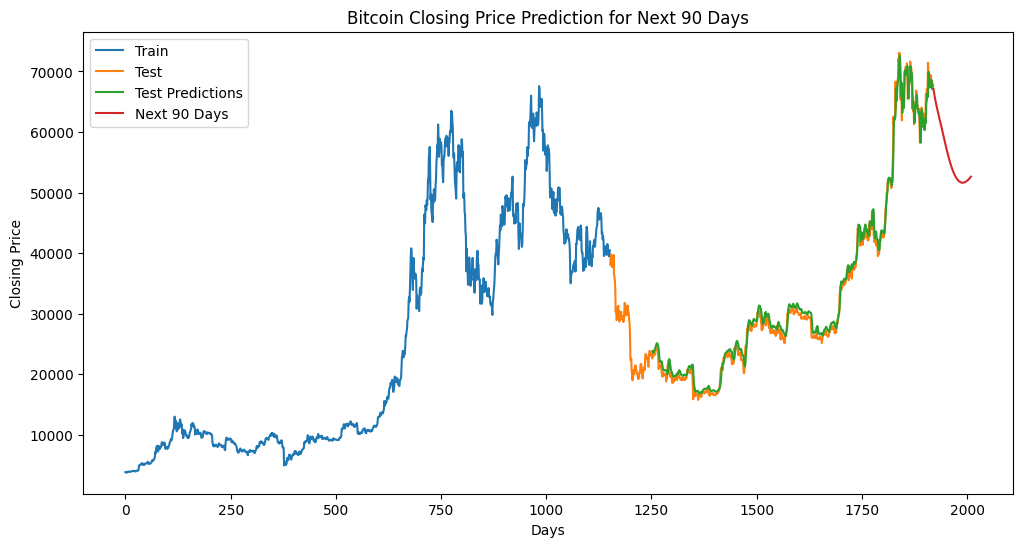

Predicted closing prices for the next 90 days:
[67118.03  66713.914 66275.18  65865.17  65481.05  65119.32  64775.4
 64444.848 64124.234 63811.164 63503.93  63201.266 62902.11  62605.523
 62310.625 62016.562 61722.598 61428.105 61132.617 60835.844 60537.613
 60237.98  59937.062 59635.156 59332.695 59030.168 58728.094 58427.145
 58127.926 57831.082 57537.26  57247.105 56961.223 56680.188 56404.547
 56134.758 55871.258 55614.46  55364.723 55122.312 54887.484 54660.46
 54441.473 54230.63  54028.07  53833.895 53648.176 53470.934 53302.195
 53141.965 52990.203 52846.863 52711.95  52585.375 52467.11  52357.08
 52255.234 52161.473 52075.73  51997.926 51927.953 51865.703 51811.016
 51763.805 51723.914 51691.227 51665.59  51646.84  51634.81  51629.348
 51630.31  51637.53  51650.84  51670.074 51695.05  51725.54  51761.38
 51802.406 51848.387 51899.156 51954.492 52014.258 52078.234 52146.258
 52218.13  52293.65  52372.633 52454.902 52540.285 52628.547]


In [37]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())